# Practicing Dynare

This notebook replicates the examples in *Practicing Dynare* by Barillas, Bhandari, Colacito, Kitao, Matthes, Sargent, and Shin. 

In [4]:
addpath('C:\dynare\4.5.7\matlab')
base_path = 'C:\Users\barry\Documents\Academics\Quantecon-Notes';
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model'

## Neoclassical Growth Model
Cooley and Prescott 1995

### Model

A representative agent's problem is 
$$
\max_{c_t,l_t} E_0 \sum_{t=1}^\infty \beta^{t-1} \frac{c_t^\theta (1-l_t)^{1-\theta})^{1-\tau}}{1-\tau}
$$

subject to the resource constraint
$$
c_t + i_t = e^{z_t}k_t^\alpha l_t^{1-\alpha}
$$
the motion of capital
$$
k_{t+1} = i_t + (1-\delta)k_t
$$
and stochastic process for productivity 
$$
z_t = \rho z_{t-1} + s\epsilon_t
$$
where $\epsilon_t \sim N(0,\sigma^2)$

### Model solution
From (2) and (3), we have $$k_{t+1} = e^{z_t}k_t^\alpha l_t^{1-\alpha} - c_t + (1-\delta)k_t$$

Lagrangian:
$$
L = \max_{c_t, l_t} E_0\sum_{t=1}^\infty \beta^{t-1} [\frac{(c_t^\theta (1-l_t)^{1-\theta})^{1-\tau}}{1-\tau} - \lambda (k_{t+1} - e^{z_t}k_t^\alpha l_t^{1-\alpha} - c_t + (1-\delta)k_t)]
$$

Take derivatives with respect to $k_t$ we have Euler equation
$$
\frac{(c_t^\theta (1-l_t)^{1-\theta})^{1-\tau}}{c_t} = \beta E_t[\frac{(c_{t+1}^\theta (1-l_{t+1})^{1-\theta})^{1-\tau}}{c_{t+1}} (1+\alpha e^{z_t}k_t^{\alpha-1}l_t^{\alpha} - \delta)]
$$

The optimality condition for labor supply is 
$$
\frac{1-\theta}{\theta} \frac{c_t}{1-l_t} = (1-\alpha)e^{z_t}k_t^\alpha l_t^{-\alpha}
$$

The equilibrium is characterized by (5), (7) and (8)

### Calibration

We use the following calibration

|parameter|calibration|
|---------|-----------|
|$\beta$|0.98|
|$\theta$|0.35|
|$\delta$|0.01|
|$\alpha$|0.4|
|$\tau$|2|
|$\rho$|0.95|
|s|0.007|
|$\sigma$|1|

### Model approximation

In [2]:
%%file Dynare_model\NGM\NGM_approx.mod

periods = 1000;
var c k l z;
varexo e;

parameters beta theta delta alpha tau rho s;

beta = 0.98;
theta = 0.35;
delta = 0.01;
alpha = 0.4;
tau = 2;
rho = 0.95;
s = 0.007;

model;
(c^theta*(1-l)^(1-theta))^(1-tau)/c = beta*((c(+1)^theta*(1-l(+1))^(1-theta))^(1-tau)/c(+1))*(1+alpha*exp(z(-1))*k(-1)^(alpha-1)*l^(1-alpha)-delta);
c = theta/(1-theta)*(1-alpha)*exp(z(-1))*k(-1)^alpha*l^(-alpha)*(1-l);
k = exp(z(-1))*k(-1)^alpha*l^(1-alpha) - c + (1-delta)*k(-1);
z = rho*z(-1)+s*e;
end;

initval;
k = 1;
c = 1;
l = 0.3;
z = 0;
e = 0;
end;

shocks;
var e;
stderr 1;
end;

steady;

stoch_simul(dr_algo = 0, periods = 1000); 

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\NGM\NGM_approx.mod'.



Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 4 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
 - order 2
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c 		 1.31218
k 		 19.8754
l 		 0.271144
z 		 0

MODEL SUMMARY

  Number of variables:         4
  Number of stochastic shocks: 1
  Number of state variables:   2
  Number of jumpers:           2
  Number of static variables:  0


MATRIX OF COVARIANCE OF EXOGENOUS SHOCKS
Variables           e
e       

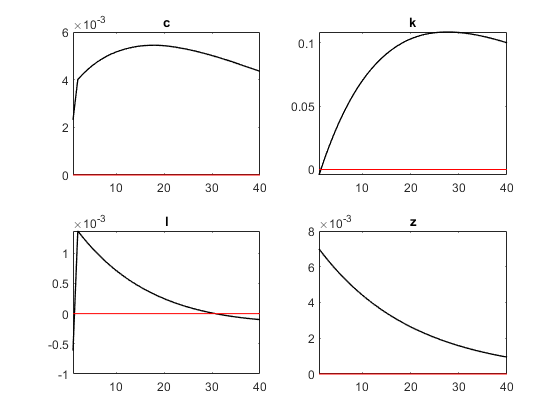

In [5]:
cd 'NGM'
dynare NGM_approx

## International Business Cycle Model
Kim and Kim (2003)

### Model
Two countries are identical ex-ante and markets are complete. A solution to a Pareto planner's problem is characterized by the following equations

$$
C_{1,t} = C_{2,t}
$$

$$
C_{1,t}^{-\gamma} = \beta E_t C_{1,t+1}^{-\gamma} (\alpha A_{1,t+1} K_{1,t+1}^{\alpha-1} +1-\delta)
$$

$$
C_{2,t}^{-\gamma} = \beta E_t C_{2,t+1}^{-\gamma} (\alpha A_{2,t+1} K_{2,t+1}^{\alpha-1} +1-\delta)
$$
$$
A_{1,t}K_{1,t}^\alpha + A_{2,t}K_{2,t}^\alpha = C_{1,t}+ C_{2,t} + K_{1,t+1} - (1-\delta)K_{1,t} + K_{2,t+1} - (1-\delta)K_{2,t}
$$
$$
\ln{A_{1,t+1}} = \rho \ln{A_{1,t}} + \epsilon_{1,t+1}
$$

$$
\ln{A_{2,t+1}} = \rho \ln{A_{2,t}} + \epsilon_{2,t+1}
$$

The first three equations are the first-order conditions with regards to the consumption and the fourth one is the world resource constraint. The last two describe the law of motion for the technological shock.

### Calibration
We use the following calibration

|Parameter|Calibration|
|---------|-----------|
|$\beta$| 0.98|
|$\delta$|0.005|
|$\alpha$|0.4|
|$\rho$|0.85|
|$\sigma_1$|0.08|
|$\sigma_2$|0.08|

Dynare computes the policy function as a second-order approximation around the (log) steady-state

In [53]:
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes'

In [54]:
%%file International_BC\International_BC_approx.mod
periods 1000;
var c1 c2 k1 k2 a1 a2;
varexo e1 e2;

parameters gamma delta alpha beta rho;

gamma = 2;
delta = 0.05;
alpha = 0.4;
beta = 0.98;
rho = 0.85;

model;
c1 = c2;
exp(c1)^(-gamma) = beta*exp(c1(+1))^(-gamma)*(alpha*exp(a1(+1))*exp(k1)^(alpha-1)+1-delta);
exp(c2)^(-gamma) = beta*exp(c2(+1))^(-gamma)*(alpha*exp(a2(+1))*exp(k2)^(alpha-1)+1-delta);
exp(c1) + exp(c2)+exp(k1) - exp(k1(-1))*(1-delta) + exp(k2) - exp(k2(-1))*(1-delta)=exp(a1)*exp(k1(-1))^alpha + exp(a2)*exp(k2(-1))^alpha;
a1 = rho*a1(-1)+e1;
a2 = rho*a2(-1)+e2;
end;

initval;
k1 = 2.8;
k2 = 2.8;
c1 = 0.8;
c2 = 0.8;
a1 = 0;
a2 = 0;
e1 = 0;
e2 = 0;
end;

shocks;
var e1;
stderr 0.08;
var e2;
stderr 0.08;
end;

steady;

stoch_simul(periods = 1000);

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\International_BC\International_BC_approx.mod'.


In [55]:
cd 'Dynare_model'
cd 'International_BC'


Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 6 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
 - order 2
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c1 		 0.823947
c2 		 0.823947
k1 		 2.89526
k2 		 2.89526
a1 		 0
a2 		 0

MODEL SUMMARY

  Number of variables:         6
  Number of stochastic shocks: 2
  Number of state variables:   4
  Number of jumpers:           4
  Number of static variables:  0


MATRIX OF COVARIANCE OF EXOGENOUS SHOCKS
Var

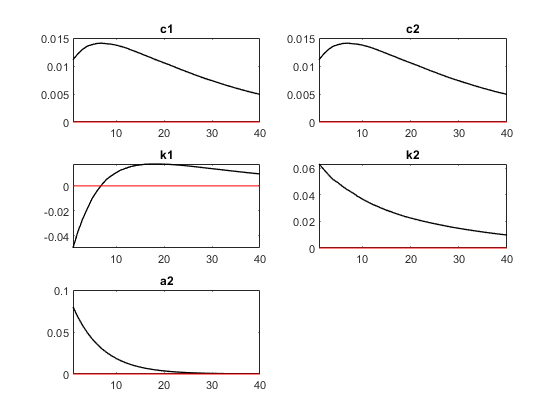

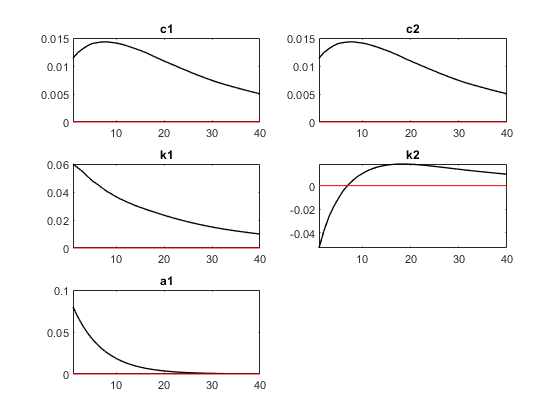

In [57]:
dynare International_BC_approx.mod

## Fiscal policies in the growth model

Ljungqvist and Sargent (2004)

### The model

A deterministic growth model with exogenous stream of government expenditure, and several kinds of distorting taxeds. 

A representative agent maximizes
$$
\sum_{t=0}^\infty \beta^t \frac{c_t^{1-\gamma}}{1-\gamma}
$$

Feasible allocation:
$$
g_t +c_t+k_t \leq Ak_t^\alpha + (1-\delta)k_t
$$
Household budget constraint
$$
\sum_{t=0}^\infty [q_t(1+\tau_{ct})+(1-\tau_{it})q_t [k_{t+1} - (1-\delta)k_t]]\leq \sum_{t=0}^\infty [r_t(1-\tau_{kt})k_t+w_t]
$$
and the government budget constraint
$$
\sum_{t=0}^\infty q_tg_t\leq \sum_{t=0}^\infty [\tau_{ct}q_tc_t-\tau_{it}q_t[k_{t+1}-(1-\delta)k_t]+r_t\tau_{kt}kt+w_t]
$$

The equilibrium is characterized as
$$c_t = Ak_t^\alpha + (1-\delta)k_t-k_{t+1}-g_t
$$
$$q_t = \beta^tc_t^{-\gamma}/(1+\tau_{ct})
$$
$$r_t/q_t = A\alpha k_t^{\alpha-1}
$$
$$w_t/q_t = Ak_t^\alpha - k_t A\alpha k_t^{\alpha-1}
$$
$$R_t = \frac{1+\tau_{ct}}{1+\tau_{ct+1}}[\frac{1+\tau_{it+1}}{1+\tau_{it}}(1-\delta) + \frac{1+\tau_{kt+1}}{1+\tau_{kt}}A\alpha k_{t+1}^{\alpha-1}]
$$
$$
s_t/q_t = (1-\tau_{kt})A\alpha k_t^{\alpha-1} + (1-\delta)
$$
$$
c_t^{-\gamma} = \beta c_{t+1}^{-\gamma}R_{t+1}
$$

### Calibration
We use the following calibration

|Parameter|Calibration|
|---------|-----------|
|$\beta$| 0.98|
|$\delta$|0.2|
|$A$|1|
|$\alpha$|0.33|
|$\gamma$|2|
|$g$|0.2|
|$\tau_c$|0|
|$\tau_i$|0|
|$\tau_k$|0|

### Model solution

In [15]:
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes'

A permanent increase in g

In [23]:
%%file Dynare_model\fiscal_policy_growth\permanent_increase_g.mod


var c k;
varexo taui tauc tauk g;
parameters bet gam del alpha A;
bet=.95; 
gam=2; 
del=.2; 
alpha=.33; 
A=1; 


model;
k=A*k(-1)^alpha+(1-del)*k(-1)-c-g;
c^(-gam)=bet*(c(+1)^(-gam))*((1+tauc(-1))/(1+tauc))*((1-taui)*(1-del)/(1-taui(-1))+((1-tauk)/(1-taui(-1)))*alpha*A*k(-1)^(alpha-1));
end;

initval; 
k=1.5; 
c=0.6; 
g = 0.2; 
tauc = 0; 
taui = 0; 
tauk = 0; 
end;
steady; 

endval;
k=1.5;
c=0.4; 
g =0.4; 
tauc =0; 
taui =0; 
tauk =0; end;
steady;

shocks;
var g; 
periods 1:9; 
values 0.2; 
end;

simul(periods=100);

co=ys0_(1);
ko = ys0_(2);
go = ex0_(1,1);

rbig0=1/bet;
rbig=c(2:101).^(-gam)./(bet*c(3:102).^(-gam));
rq0=alpha*A*ko^(alpha-1);
rq=alpha*A*k(1:100).^(alpha-1);
wq0=A*ko^alpha-ko*alpha*A*ko^(alpha-1);
wq=A*k(1:100).^alpha-k(1:100).*alpha*A.*k(1:100).^(alpha-1);
//sq0=(1-ex_(1,4))*A*alpha*ko^(alpha-1)+(1-del);
//sq=(1-ex_(1:100,4)')*A*alpha.*k(1:100).^(alpha-1)+(1-del);

figure
subplot(2,3,1)
plot([ko*ones(100,1)  k(1:100) ])
title('k')
subplot(2,3,2)
plot([co*ones(100,1)  c(2:101) ])
title('c')
subplot(2,3,3)
plot([rbig0*ones(100,1) rbig ])
title('R')
subplot(2,3,4)
plot([wq0*ones(100,1) wq ])
title('w/q')
//subplot(2,3,5)
//plot([sq0*ones(100,1) sq ])
//title('s/q')
subplot(2,3,5)
plot([rq0*ones(100,1) rq ])
title('r/q')

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\fiscal_policy_growth\permanent_increase_g.mod'.


In [24]:
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes'
cd 'Dynare_model'
cd 'fiscal_policy_growth'


Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 2 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c 		 0.642645
k 		 1.48996

STEADY-STATE RESULTS:

c 		 0.442645
k 		 1.48995

--------------------------------------------------------
MODEL SIMULATION:

Iter: 1,	 err. = 0.2, 	 time = 0.017
Iter: 2,	 err. = 0.016713, 	 time = 0.006
Iter: 3,	 err. = 0.00038444, 	 time = 0.001
Iter: 4,	 err. = 1.3226e-07, 	 tim

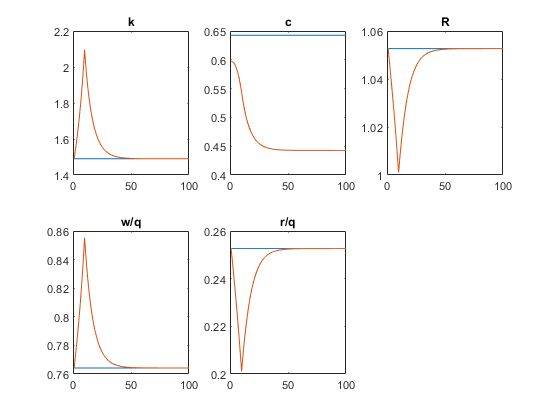

In [25]:
dynare permanent_increase_g.mod

A permanent increase in $\tau_c$

In [28]:
%%file Dynare_model\fiscal_policy_growth\permanent_increase_tau_c.mod

var c k;
varexo taui tauc tauk g;
parameters bet gam del alpha A;
bet=.95; 
gam=2; 
del=.2; 
alpha=.33; 
A=1; 


model;
k=A*k(-1)^alpha+(1-del)*k(-1)-c-g;
c^(-gam)=bet*(c(+1)^(-gam))*((1+tauc(-1))/(1+tauc))*((1-taui)*(1-del)/(1-taui(-1))+((1-tauk)/(1-taui(-1)))*alpha*A*k(-1)^(alpha-1));
end;

initval; 
k=1.5; 
c=0.6; 
g = 0.2; 
tauc = 0; 
taui = 0; 
tauk = 0; 
end;
steady; 

endval;
k=1.5;
c=0.4; 
g =0.2; 
tauc =0.2; 
taui =0; 
tauk =0; end;
steady;

shocks;
var tauc; 
periods 1:9; 
values 0; 
end;

simul(periods=100);

co=ys0_(1);
ko = ys0_(2);
go = ex0_(1,1);

rbig0=1/bet;
rbig=c(2:101).^(-gam)./(bet*c(3:102).^(-gam));
rq0=alpha*A*ko^(alpha-1);
rq=alpha*A*k(1:100).^(alpha-1);
wq0=A*ko^alpha-ko*alpha*A*ko^(alpha-1);
wq=A*k(1:100).^alpha-k(1:100).*alpha*A.*k(1:100).^(alpha-1);
//sq0=(1-ex_(1,4))*A*alpha*ko^(alpha-1)+(1-del);
//sq=(1-ex_(1:100,4)')*A*alpha.*k(1:100).^(alpha-1)+(1-del);

figure
subplot(2,3,1)
plot([ko*ones(100,1)  k(1:100) ])
title('k')
subplot(2,3,2)
plot([co*ones(100,1)  c(2:101) ])
title('c')
subplot(2,3,3)
plot([rbig0*ones(100,1) rbig ])
title('R')
subplot(2,3,4)
plot([wq0*ones(100,1) wq ])
title('w/q')
//subplot(2,3,5)
//plot([sq0*ones(100,1) sq ])
//title('s/q')
subplot(2,3,5)
plot([rq0*ones(100,1) rq ])
title('r/q')

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\fiscal_policy_growth\permanent_increase_tau_c.mod'.



Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 2 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c 		 0.642645
k 		 1.48996

STEADY-STATE RESULTS:

c 		 0.642645
k 		 1.48996

--------------------------------------------------------
MODEL SIMULATION:

Iter: 1,	 err. = 0.40356, 	 time = 0.01
Iter: 2,	 err. = 0.014566, 	 time = 0.002
Iter: 3,	 err. = 1.5284e-05, 	 time = 0.003
Iter: 4,	 err. = 9.3122e-11, 	 

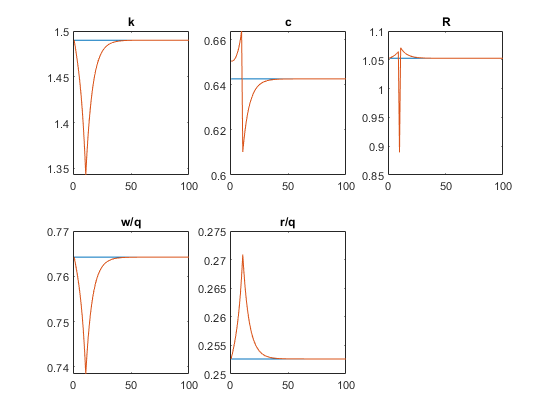

In [29]:
dynare permanent_increase_tau_c.mod

One time increase in g

In [30]:
%%file Dynare_model\fiscal_policy_growth\transit_increase_g.mod


var c k;
varexo taui tauc tauk g;
parameters bet gam del alpha A;
bet=.95; 
gam=2; 
del=.2; 
alpha=.33; 
A=1; 


model;
k=A*k(-1)^alpha+(1-del)*k(-1)-c-g;
c^(-gam)=bet*(c(+1)^(-gam))*((1+tauc(-1))/(1+tauc))*((1-taui)*(1-del)/(1-taui(-1))+((1-tauk)/(1-taui(-1)))*alpha*A*k(-1)^(alpha-1));
end;

initval; 
k=1.5; 
c=0.6; 
g = 0.2; 
tauc = 0; 
taui = 0; 
tauk = 0; 
end;
steady; 

endval;
k=1.5;
c=0.6; 
g =0.4; 
tauc =0; 
taui =0; 
tauk =0; end;
steady;

shocks;
var g; 
periods 10; 
values 0.2; 
end;

simul(periods=100);

co=ys0_(1);
ko = ys0_(2);
go = ex0_(1,1);

rbig0=1/bet;
rbig=c(2:101).^(-gam)./(bet*c(3:102).^(-gam));
rq0=alpha*A*ko^(alpha-1);
rq=alpha*A*k(1:100).^(alpha-1);
wq0=A*ko^alpha-ko*alpha*A*ko^(alpha-1);
wq=A*k(1:100).^alpha-k(1:100).*alpha*A.*k(1:100).^(alpha-1);
//sq0=(1-ex_(1,4))*A*alpha*ko^(alpha-1)+(1-del);
//sq=(1-ex_(1:100,4)')*A*alpha.*k(1:100).^(alpha-1)+(1-del);

figure
subplot(2,3,1)
plot([ko*ones(100,1)  k(1:100) ])
title('k')
subplot(2,3,2)
plot([co*ones(100,1)  c(2:101) ])
title('c')
subplot(2,3,3)
plot([rbig0*ones(100,1) rbig ])
title('R')
subplot(2,3,4)
plot([wq0*ones(100,1) wq ])
title('w/q')
//subplot(2,3,5)
//plot([sq0*ones(100,1) sq ])
//title('s/q')
subplot(2,3,5)
plot([rq0*ones(100,1) rq ])
title('r/q')

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\fiscal_policy_growth\transit_increase_g.mod'.



Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 2 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c 		 0.642645
k 		 1.48996

STEADY-STATE RESULTS:

c 		 0.442645
k 		 1.48996

--------------------------------------------------------
MODEL SIMULATION:

Iter: 1,	 err. = 0.2, 	 time = 0.008
Iter: 2,	 err. = 0.0039476, 	 time = 0.002
Iter: 3,	 err. = 1.1244e-06, 	 time = 0.002

Total time of simulation: 0.015


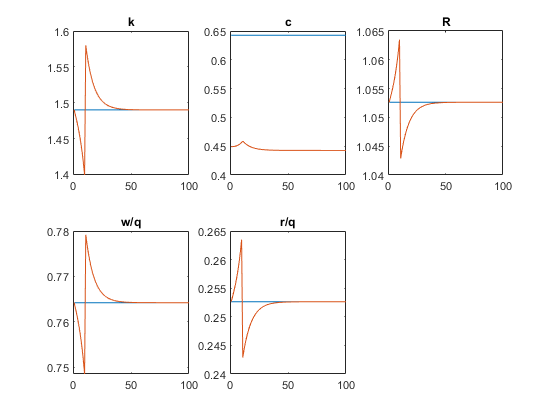

In [31]:
dynare transit_increase_g.mod